In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [76]:
train_data = pd.read_csv('../data/processed/processed_train.csv', index_col=0)
test_data = pd.read_csv('../data/processed/processed_test.csv', index_col=0)

In [77]:
site_ids = train_data["SiteId"].unique()

past_train_data = pd.DataFrame()
train_df = pd.DataFrame()
test_df = pd.DataFrame()

for site_id in site_ids:
    min_test_timestamp  = test_data[test_data["SiteId"] == site_id]["Timestamp"].min()

    site_data = train_data[(train_data["SiteId"] == site_id) & (train_data["Timestamp"] < min_test_timestamp)]

    if site_data.empty:
        test_data = test_data[test_data["SiteId"] != site_id]
        continue
    
    if(past_train_data.empty):
        past_train_data = site_data
    else: 
        past_train_data = pd.concat([past_train_data, site_data])

train_data = past_train_data

In [78]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(df):
    enc = OneHotEncoder()
    # Passing encoded columns
    enc_data = pd.get_dummies(df['SiteId'], prefix='Site')
    # Merge with main
    df = df.drop(["SiteId"], axis=1)
    df = df.join(enc_data)

    return df

train_df = one_hot_encoder(train_data)
test_df = one_hot_encoder(test_data)

train_df = train_df[train_df["Value"] < 2 * 1e7]
test_df = test_df[test_df["Value"] < 2 * 1e7]

In [79]:
train_df.head()

,Timestamp,Value,day_of_week,day_of_month,day_of_year,month,year,Temperature,is_day_off,BaseTemperature,...,Site_294,Site_295,Site_297,Site_298,Site_299,Site_300,Site_301,Site_302,Site_303,Site_304
0,2014-09-03,9.096555e+05,2,3,246,9,2014,20.00,0.0,18.0,...,0,0,0,0,0,0,0,0,0,0
1,2014-09-04,1.748273e+06,3,4,247,9,2014,22.25,0.0,18.0,...,0,0,0,0,0,0,0,0,0,0
5,2014-09-08,1.964878e+06,0,8,251,9,2014,17.80,0.0,18.0,...,0,0,0,0,0,0,0,0,0,0
6,2014-09-09,3.266904e+06,1,9,252,9,2014,19.00,0.0,18.0,...,0,0,0,0,0,0,0,0,0,0
7,2014-09-10,2.926094e+06,2,10,253,9,2014,22.00,0.0,18.0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.linear_model import LinearRegression

# scaler = MinMaxScaler()

train_df = train_df.drop(["Timestamp"], axis=1)
test_df = test_df.drop(["Timestamp"], axis=1)

# train_df = scaler.fit_transform(train_df)
# test_df = scaler.transform(test_df)

train_y = train_df["Value"]
train_x = train_df.drop(["Value"], axis=1)
test_y = test_df["Value"]
test_x = test_df.drop(["Value"], axis=1)


## Prediction

In [81]:
linear_model = LinearRegression()
linear_model.fit(train_x, train_y)
pred_y = linear_model.predict(test_x)

In [82]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, pred_y)

1034230.8044708802

In [83]:
from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred_y)
print('r2 score for model is', round(r2 * 100), "%")

r2 score for model is 64 %


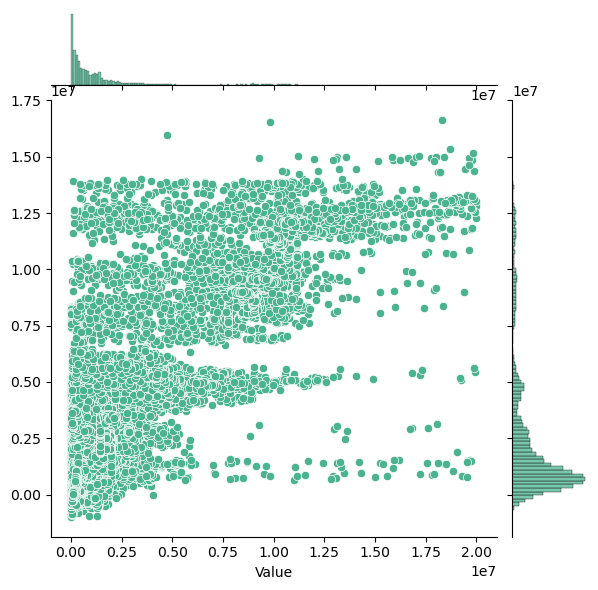

In [84]:
sns.jointplot(x=test_y ,y=pred_y, color="#4CB391")


In [85]:
from sklearn.ensemble import RandomForestRegressor
linear_model = RandomForestRegressor()
linear_model.fit(train_x, train_y)
pred_y = linear_model.predict(test_x)

In [86]:
r2 = r2_score(test_y, pred_y)
print('r2 score for model is', round(r2 * 100), "%")

r2 score for model is 68 %


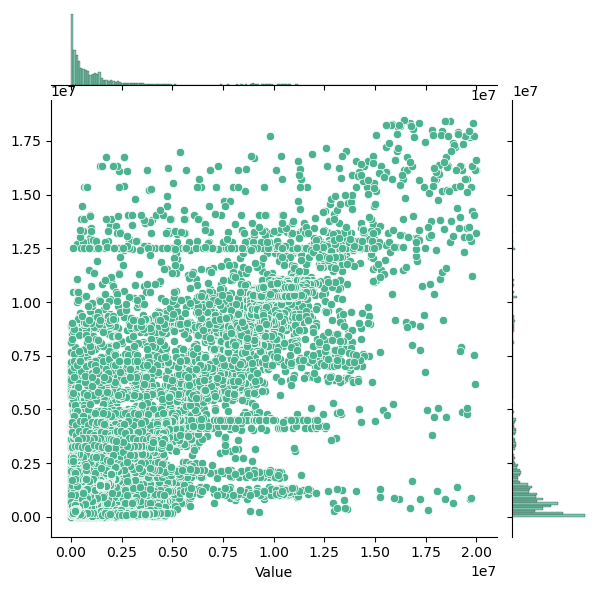

In [87]:
sns.jointplot(x=test_y ,y=pred_y, color="#4CB391")